# Model Test Round Two 
Now that I have seen what my model does as a baseline, I can start making some changes, namely resampling  

## Set-up the Data 
As always I will start by importing the necessary packages and setting up the dataframes.

In [40]:
#Code for importing packages
import pandas as pd  
import warnings
warnings.filterwarnings("ignore")  
import numpy as np 
from math import ceil
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,auc 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import plot_confusion_matrix 
from sklearn.metrics import classification_report 
from scipy.spatial.distance import euclidean 
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score 
from sklearn.neighbors import KNeighborsClassifier   
from sklearn.preprocessing import StandardScaler 
from sklearn.tree import DecisionTreeClassifier   
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree 
from sklearn.feature_selection import SelectFromModel  
from imblearn.over_sampling import SMOTE, ADASYN 
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier 
from xgboost import XGBClassifier

#Since most all my models ended up wanting me to create dummies anyway I will just work with the the dataset where I have already done that.

In [5]:
#Since most all my models ended up wanting me to create dummies anyway I will just work with the 
dfd = pd.read_csv('data_ad.csv') #Sets up dataframe that contains all dummies
del dfd['Unnamed: 0'] #deletes old index column

dfd.head()

,age,height,works_in_tech,female,male,bisexual,gay,straight,body_average,body_curvy/full_figured,...,virgo,language_unknown,speaks_bengali,speaks_chinese,speaks_english,speaks_hindi,speaks_japanese,speaks_portuguese,speaks_russian,speaks_spanish
0,22,75.0,0,0,1,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,35,70.0,0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
2,29,66.0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,29,67.0,1,0,1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
4,31,65.0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [3]:
dfd.works_in_tech.value_counts()

0    28760
1     9557
Name: works_in_tech, dtype: int64

In [6]:
#Variable Set Up
data = dfd.drop(["works_in_tech"],axis=1) 
target = dfd["works_in_tech"]

In [5]:
#Baseline Accuracy 
neg_obs = dfd.works_in_tech.value_counts()[0] 
pos_obs = dfd.works_in_tech.value_counts()[1] 
all_obs = neg_obs + pos_obs
baseline_accuracy = pos_obs / all_obs 
baseline_accuracy

0.2494193177962784

## Model Test 
Now we can begin our model test with rebalanced classes using smote. 

#### Logistic Regression 
First I will look at logistic regression as well as a few metrics from the confusion matrix.

In [7]:
#Set Variables
X = data
y = target 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 ,random_state=123)

In [8]:
# Normalize the Data
X = X.apply(lambda x : (x - x.min()) /(x.max() - x.min()),axis=0)

# Split the data into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 

#Rebalance with 
sm = SMOTE(sampling_strategy = 'minority', random_state = 123)
X_train, y_train = sm.fit_resample(X_train, y_train)  

print(pd.Series(y_train).value_counts())

1    21581
0    21581
Name: works_in_tech, dtype: int64


LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')
AUC: 0.7200569396679778
AUC: 0.7200569396679778


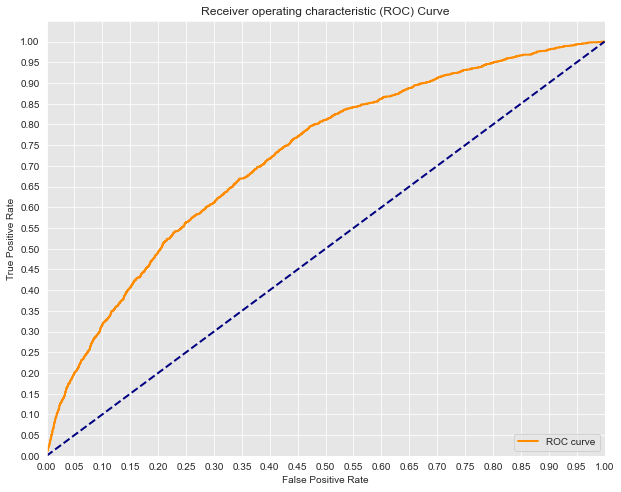

In [60]:
# Fit a model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
logreg.fit(X_train, y_train)
print(logreg) # Preview model params

# Predict
y_hat_test = logreg.predict(X_test)

# First calculate the probability scores of each of the datapoints:
y_score = logreg.fit(X_train, y_train).decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score) 

#Calculate AUC 
print('AUC: {}'.format(auc(fpr, tpr))) 
#Example visualizing of ROC and AUC: 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show() 

[[18863  9897]
 [ 3171  6386]]


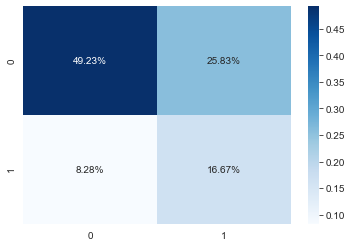

In [9]:
y_pred = logreg.predict(X)
#Get the confusion matrix
cf_matrix = confusion_matrix(y, y_pred)
print(cf_matrix)

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues') 
plt.show()

In [10]:
# Fit to training data
model_log = logreg.fit(X_train, y_train)
model_log

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [54]:
def precision(y, y_hat):
    # Could also use confusion matrix
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 1])
    fp = sum([1 for i in y_y_hat if i[0] == 0 and i[1] == 1])
    return tp / float(tp + fp) 

def recall(y, y_hat):
    # Could also use confusion matrix
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 1])
    fn = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 0])
    return tp / float(tp + fn) 

def accuracy(y, y_hat):
    # Could also use confusion matrix
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 1])
    tn = sum([1 for i in y_y_hat if i[0] == 0 and i[1] == 0])
    return (tp + tn) / float(len(y_hat)) 

def f1(y, y_hat):
    precision_score = precision(y, y_hat)
    recall_score = recall(y, y_hat)
    numerator = precision_score * recall_score
    denominator = precision_score + recall_score
    return 2 * (numerator / denominator)

In [61]:
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

print('Model Type: ', 'Logistic Regression')
print('Training Precision: ', precision(y_train, y_hat_train))
print('Testing Precision: ', precision(y_test, y_hat_test))
print('\n\n')

print('Training Recall: ', recall(y_train, y_hat_train))
print('Testing Recall: ', recall(y_test, y_hat_test))
print('\n\n')

print('Training Accuracy: ', accuracy(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy(y_test, y_hat_test))
print('\n\n')

print('Training F1-Score: ', f1(y_train, y_hat_train))
print('Testing F1-Score: ', f1(y_test, y_hat_test))

Model Type:  Logistic Regression
Training Precision:  0.6746399602714782
Testing Precision:  0.3907078266292485



Training Recall:  0.7088134266707248
Testing Recall:  0.6584340514976353



Training Accuracy:  0.6834862385321101
Testing Accuracy:  0.6602296450939458



Training F1-Score:  0.6913046243877615
Testing F1-Score:  0.4904109589041097


#### Logistic Regression 

As compared to baseline accuracy as well as the unbalanced model test, this model does perform significantly better even before feature selection and any boosting. Though it is also rather overfit.

### KNN Model 
Now I will run my model without dummies thru a KNN model. 

In [13]:
df1 = dfd.copy()

In [64]:
# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train, columns=data.columns)

In [65]:
# Instantiate KNeighborsClassifier
clf = KNeighborsClassifier()

# Fit the classifier
clf.fit(scaled_data_train, y_train)

# Predict on the test set
test_preds = clf.predict(scaled_data_test)

In [66]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_preds)

Precision Score: 0.32035661218424966
Recall Score: 0.5664739884393064
Accuracy Score: 0.593945720250522
F1 Score: 0.4092634776006075


In [67]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score)) 

In [69]:
y_hat_train = clf.predict(X_train)
y_hat_test = clf.predict(X_test)

print('Model Type: ', 'KNN')
print('Training Precision: ', precision(y_train, y_hat_train))
print('Testing Precision: ', precision(y_test, y_hat_test))
print('\n\n')

print('Training Recall: ', recall(y_train, y_hat_train))
print('Testing Recall: ', recall(y_test, y_hat_test))
print('\n\n')

print('Training Accuracy: ', accuracy(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy(y_test, y_hat_test))
print('\n\n')

print('Training F1-Score: ', f1(y_train, y_hat_train))
print('Testing F1-Score: ', f1(y_test, y_hat_test))

Model Type:  KNN
Training Precision:  0.5023812733072741
Testing Precision:  0.24864937871420853



Training Recall:  0.9723466237662507
Testing Recall:  0.9674198633736206



Training Accuracy:  0.5046088960389582
Testing Accuracy:  0.2660490605427975



Training F1-Score:  0.6624798187015833
Testing F1-Score:  0.3956162028580638


#### KNN Conclusion 

Although this model also performs better than the baseline and unbalanced dta models, it does not preform as well than the logistic regression model. 

### Decision Tree Model 
Now I will run my model without dummies thru a decision model. 

In [71]:
y_hat_train = clf.predict(X_train)
y_hat_test = clf.predict(X_test)

print('Model Type: ', 'Decision Tree')
print('Training Precision: ', precision(y_train, y_hat_train))
print('Testing Precision: ', precision(y_test, y_hat_test))
print('\n\n')

print('Training Recall: ', recall(y_train, y_hat_train))
print('Testing Recall: ', recall(y_test, y_hat_test))
print('\n\n')

print('Training Accuracy: ', accuracy(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy(y_test, y_hat_test))
print('\n\n')

print('Training F1-Score: ', f1(y_train, y_hat_train))
print('Testing F1-Score: ', f1(y_test, y_hat_test))

Model Type:  Decision Tree
Training Precision:  1.0
Testing Precision:  0.33168805528134254



Training Recall:  0.9997825992434454
Testing Recall:  0.3531266421439832



Training Accuracy:  0.9998912996217226
Testing Accuracy:  0.6627087682672234



Training F1-Score:  0.999891287804666
Testing F1-Score:  0.3420717739882922


#### Decision Tree Conclusion 
Decision tree also appears to perform better than the previous version but also appers overfit. 

### Random Forest Tree Model 
Now I will run my model without dummies thru a random forest model. 

In [56]:
# Instantiate and fit a DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5) 
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [57]:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

DecisionTreeClassifier(max_depth=5, presort=False)

In [58]:
# Test set predictions
pred = tree_clf.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[3332 2429]
 [ 614 1289]]
              precision    recall  f1-score   support

           0       0.84      0.58      0.69      5761
           1       0.35      0.68      0.46      1903

    accuracy                           0.60      7664
   macro avg       0.60      0.63      0.57      7664
weighted avg       0.72      0.60      0.63      7664



In [24]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 60.76%


In [20]:
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [26]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

RandomForestClassifier(max_depth=5, random_state=123)

In [27]:
# Test set predictions
pred = forest.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[4465 2714]
 [ 725 1676]]
              precision    recall  f1-score   support

           0       0.86      0.62      0.72      7179
           1       0.38      0.70      0.49      2401

    accuracy                           0.64      9580
   macro avg       0.62      0.66      0.61      9580
weighted avg       0.74      0.64      0.66      9580



In [72]:
y_hat_train = forest.predict(X_train)
y_hat_test = forest.predict(X_test)

print('Model Type: ', 'Random Forest')
print('Training Precision: ', precision(y_train, y_hat_train))
print('Testing Precision: ', precision(y_test, y_hat_test))
print('\n\n')

print('Training Recall: ', recall(y_train, y_hat_train))
print('Testing Recall: ', recall(y_test, y_hat_test))
print('\n\n')

print('Training Accuracy: ', accuracy(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy(y_test, y_hat_test))
print('\n\n')

print('Training F1-Score: ', f1(y_train, y_hat_train))
print('Testing F1-Score: ', f1(y_test, y_hat_test))

Model Type:  Random Forest
Training Precision:  0.6752847255282528
Testing Precision:  0.3749644381223329



Training Recall:  0.8017739901734858
Testing Recall:  0.6925906463478718



Training Accuracy:  0.7081177442497499
Testing Accuracy:  0.6370041753653445



Training F1-Score:  0.7331133463205183
Testing F1-Score:  0.48652639350313776


In [22]:
#Creaes a function to check the importance of each feature
def plot_feature_imporances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize = (8,8))
    plt.barh(range(n_features), model.feature_importances_, align = 'center')
    plt.yticks(np.arange(n_features), X_train.columns.values)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature') 

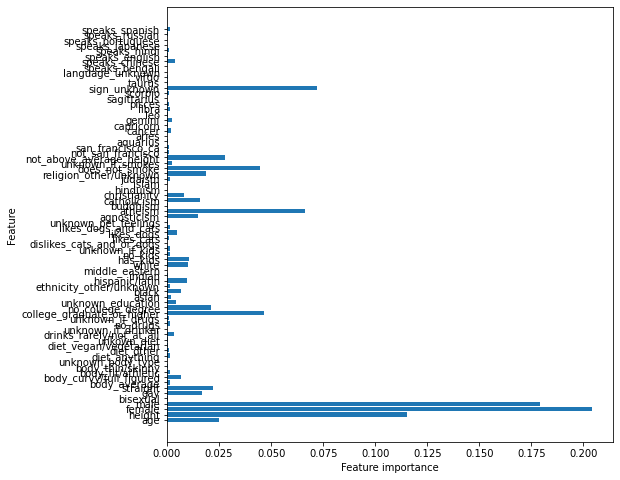

In [24]:
plot_feature_imporances(forest)

#### AdaBoost, Gradient Boosting, and XGB Boost 

As a last step I will now see if any of the boosted classifiers can improve my numbers.

In [26]:
#Variable Set Up
X = dfd.drop(["works_in_tech"],axis=1) #Sets X to all columns except the target
y = dfd["works_in_tech"] #Set the target column 

# Normalize the Data
X = X.apply(lambda x : (x - x.min()) /(x.max() - x.min()),axis=0)

#Split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 ,random_state=123)  

#Rebalance with 
sm = SMOTE(sampling_strategy = 'minority', random_state = 123)
X_train, y_train = sm.fit_resample(X_train, y_train)  

print(pd.Series(y_train).value_counts())

1    22999
0    22999
Name: works_in_tech, dtype: int64


In [31]:
# Instantiate an AdaBoostClassifier
adaboost_clf = AdaBoostClassifier(random_state=123)
adaboost_clf.fit(X_train, y_train)
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=123)
# Instantiate an GradientBoostingClassifier
gbt_clf = GradientBoostingClassifier(random_state=123)
gbt_clf.fit(X_train, y_train)
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) 

# AdaBoost model predictions
adaboost_train_preds = adaboost_clf.predict(X_train)
adaboost_test_preds = adaboost_clf.predict(X_test)

# GradientBoosting model predictions
gbt_clf_train_preds = gbt_clf.predict(X_train)
gbt_clf_test_preds = gbt_clf.predict(X_test)
def display_acc_and_f1_score(true, preds, model_name):
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds)
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("F1-Score: {}".format(f1))

In [33]:
#Run Eval Methods   
print("Training Metrics")
display_acc_and_f1_score(y_train, adaboost_train_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_train, gbt_clf_train_preds, model_name='Gradient Boosted Trees')
print("")
print("Testing Metrics")
display_acc_and_f1_score(y_test, adaboost_test_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_test, gbt_clf_test_preds, model_name='Gradient Boosted Trees')

Training Metrics
Model: AdaBoost
Accuracy: 0.7639245184573242
F1-Score: 0.7690311602679996

Model: Gradient Boosted Trees
Accuracy: 0.8169268229053437
F1-Score: 0.8116739349211674

Testing Metrics
Model: AdaBoost
Accuracy: 0.6916753653444676
F1-Score: 0.46695240243627345

Model: Gradient Boosted Trees
Accuracy: 0.7322546972860126
F1-Score: 0.43


In [73]:
y_hat_train = adaboost_clf.predict(X_train)
y_hat_test = adaboost_clf.predict(X_test)

print('Model Type: ', 'Adaboost')
print('Training Precision: ', precision(y_train, y_hat_train))
print('Testing Precision: ', precision(y_test, y_hat_test))
print('\n\n')

print('Training Recall: ', recall(y_train, y_hat_train))
print('Testing Recall: ', recall(y_test, y_hat_test))
print('\n\n')

print('Training Accuracy: ', accuracy(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy(y_test, y_hat_test))
print('\n\n')

print('Training F1-Score: ', f1(y_train, y_hat_train))
print('Testing F1-Score: ', f1(y_test, y_hat_test))

Model Type:  Adaboost
Training Precision:  0.7527481678880746
Testing Precision:  0.4090909090909091



Training Recall:  0.7860341753989304
Testing Recall:  0.5438780872306884



Training Accuracy:  0.7639245184573242
Testing Accuracy:  0.6916753653444676



Training F1-Score:  0.7690311602679996
Testing F1-Score:  0.46695240243627345


In [74]:
y_hat_train = gbt_clf.predict(X_train)
y_hat_test = gbt_clf.predict(X_test)

print('Model Type: ', 'Gradient Boosting')
print('Training Precision: ', precision(y_train, y_hat_train))
print('Testing Precision: ', precision(y_test, y_hat_test))
print('\n\n')

print('Training Recall: ', recall(y_train, y_hat_train))
print('Testing Recall: ', recall(y_test, y_hat_test))
print('\n\n')

print('Training Accuracy: ', accuracy(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy(y_test, y_hat_test))
print('\n\n')

print('Training F1-Score: ', f1(y_train, y_hat_train))
print('Testing F1-Score: ', f1(y_test, y_hat_test))

Model Type:  Gradient Boosting
Training Precision:  0.8356511328053049
Testing Precision:  0.4560989982321744



Training Recall:  0.7890343058393843
Testing Recall:  0.40672622175512346



Training Accuracy:  0.8169268229053437
Testing Accuracy:  0.7322546972860126



Training F1-Score:  0.8116739349211674
Testing F1-Score:  0.43


In [41]:
# Instantiate XGBClassifier
xgb = XGBClassifier()

# Fit XGBClassifier
xgb.fit(X_train, y_train)

# Predict on training and test sets
training_preds = xgb.predict(X_train)
test_preds = xgb.predict(X_test)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 81.56%
Validation accuracy: 73.06%


In [75]:
y_hat_train = xgb.predict(X_train)
y_hat_test = xgb.predict(X_test)

print('Model Type: ', 'XGBoost')
print('Training Precision: ', precision(y_train, y_hat_train))
print('Testing Precision: ', precision(y_test, y_hat_test))
print('\n\n')

print('Training Recall: ', recall(y_train, y_hat_train))
print('Testing Recall: ', recall(y_test, y_hat_test))
print('\n\n')

print('Training Accuracy: ', accuracy(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy(y_test, y_hat_test))
print('\n\n')

print('Training F1-Score: ', f1(y_train, y_hat_train))
print('Testing F1-Score: ', f1(y_test, y_hat_test))

Model Type:  XGBoost
Training Precision:  0.8307439974486309
Testing Precision:  0.4532332563510393



Training Recall:  0.7928170790034349
Testing Recall:  0.41250656857593276



Training Accuracy:  0.8156441584416714
Testing Accuracy:  0.7305584551148225



Training F1-Score:  0.8113375456082583
Testing F1-Score:  0.43191196698762035


### Model Selection Conclusion 

While adaboost, gradient boost, and xgb all perform decently well, the results are highly unstable and vary from prediction to prediction.

## Feature Selection  

I will now use random forest to select which features to move forward with. 

In [28]:
len(dfd.columns)

75

In [46]:
feat_labels = ['age', 'height', 'female', 'male', 'bisexual', 'gay', 'straight', 'body_average', 'body_curvy/full_figured', 'body_fit/athletic', 'body_thin/skinny', 
               'unknown_body_type',  'diet_anything', 'diet_other', 'diet_vegan/vegetarian', 'unkown_diet','drinks_rarely/not_at_all', 'unknown_if_drinker', 'no_drugs',
               'unknown_if_drugs', 'college_graduate_or_higher', 'no_college_degree','unknown_education', 'asian', 'black', 'ethnicity_other/unknown',  'hispanic/latin', 
               'indian', 'middle_eastern', 'white', 'has_kids', 'no_kids', 'unknown_if_kids', 'dislikes_cats_and_or_dogs', 'likes_cats',  'likes_dogs', 'likes_dogs_and_cats',
               'unknown_pet_feelings', 'agnosticism', 'atheism', 'buddhism', 'catholicism', 'christianity','hinduism', 'islam', 'judaism', 'religion_other/unknown',
               'does_not_smoke', 'unknown_if_smokes', 'not_above_average_height', 'not_san_francisco', 'san_francisco_ca', 'aquarius', 'aries', 'cancer', 'capricorn', 
               'gemini', 'leo', 'libra', 'pisces', 'sagittarius', 'scorpio', 'sign_unknown', 'taurus', 'virgo', 'language_unknown','speaks_bengali', 'speaks_chinese', 
               'speaks_english', 'speaks_hindi', 'speaks_japanese', 'speaks_portuguese', 'speaks_russian', 'speaks_spanish']

In [30]:
# Create a forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

('age', 0.0850507017364356)
('height', 0.08714575358191554)
('female', 0.04088925513740705)
('male', 0.04083211035273725)
('bisexual', 0.003021089759551016)
('gay', 0.009943337365736295)
('straight', 0.012409465960618161)
('body_average', 0.01500927749524342)
('body_curvy/full_figured', 0.011805381362815965)
('body_fit/athletic', 0.018465393185902165)
('body_thin/skinny', 0.00930948070073143)
('unknown_body_type', 0.008260499053122391)
('diet_anything', 0.017034571231823385)
('diet_other', 0.0045156221343091675)
('diet_vegan/vegetarian', 0.008777403637753168)
('unkown_diet', 0.015676857473155403)
('drinks_rarely/not_at_all', 0.016433004795624987)
('unknown_if_drinker', 0.004445764980490294)
('no_drugs', 0.018035442606751453)
('unknown_if_drugs', 0.014438177771130092)
('college_graduate_or_higher', 0.018453991321656177)
('no_college_degree', 0.010351067552331018)
('unknown_education', 0.007220335141832885)
('asian', 0.011105350184669287)
('black', 0.006259067830789479)
('ethnicity_other

In [44]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.
sfm = SelectFromModel(adaboost_clf, threshold=0.01)

# Train the selector
sfm.fit(X_train, y_train)

SelectFromModel(estimator=AdaBoostClassifier(random_state=123), threshold=0.01)

In [47]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

age
female
gay
body_average
body_fit/athletic
drinks_rarely/not_at_all
no_drugs
unknown_if_drugs
college_graduate_or_higher
hispanic/latin
white
has_kids
likes_dogs
likes_dogs_and_cats
unknown_pet_feelings
agnosticism
atheism
religion_other/unknown
does_not_smoke
aquarius
capricorn
sign_unknown
speaks_english
speaks_spanish


In [50]:
selected_feat = [ 'age', 'height', 'female', 'straight', 'body_average', 'body_curvy/full_figured', 'diet_anything', 'drinks_rarely/not_at_all', 'no_drugs',
                 'college_graduate_or_higher', 'white', 'has_kids', 'likes_dogs', 'likes_dogs_and_cats', 'atheism', 'religion_other/unknown', 'does_not_smoke', 
                 'not_above_average_height', 'san_francisco_ca', 'sign_unknown', 'speaks_english', 'works_in_tech'] 
sel_feat_ds = dfd[selected_feat] 
sel_feat_ds.head()

,age,height,female,straight,body_average,body_curvy/full_figured,diet_anything,drinks_rarely/not_at_all,no_drugs,college_graduate_or_higher,...,likes_dogs,likes_dogs_and_cats,atheism,religion_other/unknown,does_not_smoke,not_above_average_height,san_francisco_ca,sign_unknown,speaks_english,works_in_tech
0,22,75.0,0,1,0,1,1,0,1,0,...,0,1,0,0,0,0,1,0,1,0
1,35,70.0,0,1,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,29,66.0,0,1,0,0,0,0,1,1,...,0,1,0,1,1,0,1,0,1,0
3,29,67.0,0,1,1,0,1,0,0,1,...,0,0,1,0,1,0,1,0,0,1
4,31,65.0,1,1,1,0,1,0,1,1,...,0,1,0,0,1,0,1,0,0,0


In [34]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

In [35]:
# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)

RandomForestClassifier(n_estimators=10000, n_jobs=-1, random_state=0)

In [36]:
# Apply The Full Featured Classifier To The Test Data
y_pred = clf.predict(X_test)

# View The Accuracy Of Our Full Feature (4 Features) Model
accuracy_score(y_test, y_pred)

0.7548016701461377

In [37]:
# Apply The Full Featured Classifier To The Test Data
y_important_pred = clf_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature (2 Features) Model
accuracy_score(y_test, y_important_pred)

0.7453027139874739

# Conclusion 

In my final notebook, I will give a brief recap of everything I have done here as well as work to improve my chosen model and discuss the the business case use for it.  

In [49]:
sel_feat_ds.to_csv('selected_feat_data.csv')